In [1]:
!pip install transformers

In [36]:
from PIL import Image
import requests
from transformers import AutoProcessor, BlipForConditionalGeneration,AutoTokenizer
# from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
tokenizer = AutoTokenizer.from_pretrained("Salesforce/blip-image-captioning-base")


In [4]:
!ls

Images	Img_to_Text.ipynb  captions.txt  main.py


In [5]:
%cd "/teamspace/studios/this_studio/Images"

/teamspace/studios/this_studio/Images


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
pwd

'/teamspace/studios/this_studio/Images'

In [37]:
image_paths="/teamspace/studios/this_studio/Images"

In [10]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline
# pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base",max_new_tokens=200)

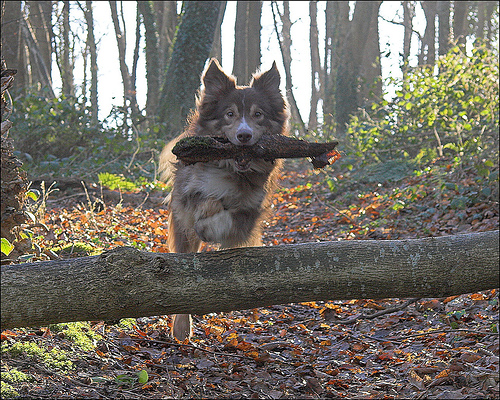

In [35]:
# images[0]

In [36]:
# pipe(images[0])[0]['generated_text']

'a dog is carrying a stick in its mouth'

In [38]:
caption_file = '/teamspace/studios/this_studio/captions.txt'

In [39]:
import pandas as pd
# Assuming your .txt file is tab-separated (if not, change the delimiter)
df = pd.read_csv(caption_file, delimiter=',')
# Display the DataFrame
df.head()


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [40]:
x_train = df[0:21]


In [41]:
image_paths

'/teamspace/studios/this_studio/Images'

In [42]:
import os
input_image_paths = []
for i in range(len(x_train['image'])):
  input_image_paths.append(os.path.join(image_paths,x_train['image'][i]))



In [43]:
len(input_image_paths)

21

In [44]:
input_image_paths[0:5]

['/teamspace/studios/this_studio/Images/1000268201_693b08cb0e.jpg',
 '/teamspace/studios/this_studio/Images/1000268201_693b08cb0e.jpg',
 '/teamspace/studios/this_studio/Images/1000268201_693b08cb0e.jpg',
 '/teamspace/studios/this_studio/Images/1000268201_693b08cb0e.jpg',
 '/teamspace/studios/this_studio/Images/1000268201_693b08cb0e.jpg']

In [45]:
import cv2

In [16]:
pwd

'/teamspace/studios/this_studio'

In [46]:
import os
images = []
for image in input_image_paths:
  i_image = cv2.imread(image)
  images.append(i_image)

In [47]:
images[0]

array([[[ 77,  56,  58],
        [130, 131, 115],
        [117, 123, 106],
        ...,
        [  2,   4,   4],
        [  2,   4,   4],
        [  4,   6,   6]],

       [[ 73,  55,  56],
        [126, 132, 115],
        [117, 123, 106],
        ...,
        [  5,   5,   5],
        [ 13,  17,  12],
        [  2,   8,   3]],

       [[ 69,  51,  52],
        [123, 130, 115],
        [119, 125, 108],
        ...,
        [  6,  11,  10],
        [  6,   9,   7],
        [  3,   4,   2]],

       ...,

       [[ 11,  78, 193],
        [ 41, 154, 221],
        [116, 244, 243],
        ...,
        [204, 185, 170],
        [205, 184, 169],
        [193, 185, 168]],

       [[ 31,  88, 187],
        [137, 239, 252],
        [ 99, 196, 255],
        ...,
        [202, 186, 170],
        [203, 184, 169],
        [193, 184, 170]],

       [[ 25, 100, 200],
        [ 26, 106, 199],
        [  6,  66, 166],
        ...,
        [201, 186, 170],
        [200, 184, 167],
        [192, 183, 169]]

In [48]:
len(x_train['caption'])

21

In [49]:
len(images)

21

In [50]:
x_train['caption'][0]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

In [51]:
type(x_train['caption'])

pandas.core.series.Series

In [52]:
processor(images=images[0],text=x_train['caption'][0])

{'pixel_values': [array([[[-0.68278205,  0.07633615, -0.08424664, ..., -1.7484672 ,
         -1.7192703 , -1.7484672 ],
        [-0.7557742 ,  0.00334391, -0.06964822, ..., -1.7192703 ,
         -1.6462783 , -1.7630657 ],
        [-0.8141679 , -0.01125452,  0.00334391, ..., -1.6608766 ,
         -1.7484672 , -1.6462783 ],
        ...,
        [-1.6462783 , -1.6024829 , -1.1499318 , ...,  1.1858164 ,
          1.2150133 ,  1.0398322 ],
        [-1.4856956 , -0.37621516, -0.11344349, ...,  1.171218  ,
          1.1858164 ,  1.0252337 ],
        [-1.398105  , -0.9747507 , -1.398105  , ...,  1.1420212 ,
          1.1420212 ,  1.0106354 ]],

       [[-0.9116621 ,  0.19891284,  0.09385836, ..., -1.6920661 ,
         -1.6470428 , -1.6470428 ],
        [-0.95668536,  0.19891284,  0.10886613, ..., -1.6170272 ,
         -1.5419884 , -1.6770582 ],
        [-1.0167165 ,  0.16889732,  0.13888167, ..., -1.6170272 ,
         -1.6170272 , -1.4069184 ],
        ...,
        [-0.49144456, -0.2813358 ,  

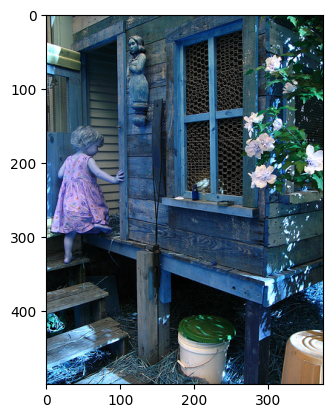

In [26]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [59]:
# from datasets import load_dataset
# demo_dataset = load_dataset("ybelkada/football-dataset", split="train")
# demo_dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 6
})

In [20]:
!pip install datasets

In [53]:
from torch.utils.data import Dataset, DataLoader
train_data = []
for i in range(len(images)):    
    encoding = processor(images=images[i], text=x_train['caption'][i], padding="max_length", return_tensors="pt")
    # remove batch dimension
    encoding = {k:v.squeeze() for k,v in encoding.items()}
    train_data.append(encoding)

In [54]:
train_dataset = train_data
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)

In [56]:
train_dataset[0]

{'pixel_values': tensor([[[-0.6828,  0.0763, -0.0842,  ..., -1.7485, -1.7193, -1.7485],
          [-0.7558,  0.0033, -0.0696,  ..., -1.7193, -1.6463, -1.7631],
          [-0.8142, -0.0113,  0.0033,  ..., -1.6609, -1.7485, -1.6463],
          ...,
          [-1.6463, -1.6025, -1.1499,  ...,  1.1858,  1.2150,  1.0398],
          [-1.4857, -0.3762, -0.1134,  ...,  1.1712,  1.1858,  1.0252],
          [-1.3981, -0.9748, -1.3981,  ...,  1.1420,  1.1420,  1.0106]],
 
         [[-0.9117,  0.1989,  0.0939,  ..., -1.6921, -1.6470, -1.6470],
          [-0.9567,  0.1989,  0.1089,  ..., -1.6170, -1.5420, -1.6771],
          [-1.0167,  0.1689,  0.1389,  ..., -1.6170, -1.6170, -1.4069],
          ...,
          [-0.4914, -0.2813,  0.2139,  ...,  1.0243,  0.9943,  1.0243],
          [-0.5215,  1.3245,  1.7147,  ...,  1.0393,  1.0093,  1.0093],
          [-0.2813,  0.3640, -0.3114,  ...,  1.0393,  1.0093,  0.9943]],
 
         [[-0.6555,  0.1409,  0.0271,  ..., -1.4233, -1.3949, -1.4091],
          [-

In [57]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)
    attention_mask = batch.pop("attention_mask").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    attention_mask = attention_mask,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0
Loss: 13.073125839233398
Loss: 10.649820327758789
Loss: 9.806734085083008
Loss: 9.229666709899902
Loss: 8.96805477142334
Loss: 8.743406295776367
Loss: 8.484335899353027
Loss: 8.320710182189941
Loss: 8.15817928314209
Loss: 8.005038261413574
Loss: 7.865649223327637
Epoch: 1
Loss: 7.713021755218506
Loss: 7.577078342437744
Loss: 7.43593692779541
Loss: 7.275826930999756
Loss: 7.1872124671936035
Loss: 7.076385974884033
Loss: 6.8957319259643555
Loss: 6.8285017013549805
Loss: 6.6708807945251465
Loss: 6.516604900360107
Loss: 6.445588111877441
Epoch: 2
Loss: 6.314948558807373
Loss: 6.170475482940674
Loss: 6.049548625946045
Loss: 5.900989532470703
Loss: 5.80072546005249
Loss: 5.679880142211914
Loss: 5.499904155731201
Loss: 5.437469482421875
Loss: 5.298675060272217
Loss: 5.147788047790527
Loss: 5.011500835418701
Epoch: 3
Loss: 4.88592004776001
Loss: 4.774551868438721
Loss: 4.643054962158203
Loss: 4.506351470947266
Loss: 4.3445353507995605
Loss: 4.243618011474609
Loss: 4.096675395965576
Lo

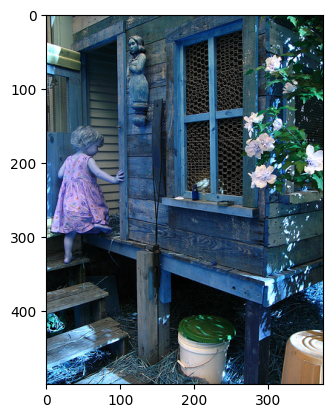

In [59]:
plt.imshow(images[1])

In [64]:
output_dir = "/teamspace/studios/this_studio/Fine-tuned-model"

# Save the fine-tuned model
model.save_pretrained(output_dir)

# Original Model Output

In [72]:
# Checking the output against the original model
print(input_image_paths[0])
from PIL import Image
img = Image.open(input_image_paths[0])
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base",max_new_tokens=200)
pipe(img)[0]['generated_text']

/teamspace/studios/this_studio/Images/1000268201_693b08cb0e.jpg


'a little girl in a pink dress'

# Fine-Tuned Model Output

In [71]:
# prepare image for the model
inputs = processor(images=images[1], return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a little girl climbing the stairs to her playhouse.


In [73]:
x_train['caption'].head(15)

0     A child in a pink dress is climbing up a set o...
1                 A girl going into a wooden building .
2      A little girl climbing into a wooden playhouse .
3     A little girl climbing the stairs to her playh...
4     A little girl in a pink dress going into a woo...
5            A black dog and a spotted dog are fighting
6     A black dog and a tri-colored dog playing with...
7     A black dog and a white dog with brown spots a...
8     Two dogs of different breeds looking at each o...
9       Two dogs on pavement moving toward each other .
10    A little girl covered in paint sits in front o...
11    A little girl is sitting in front of a large p...
12    A small girl in the grass plays with fingerpai...
13    There is a girl with pigtails sitting in front...
14    Young girl with pigtails painting outside in t...
Name: caption, dtype: object

# Another testing of generated captions between Original and fine-tuned model

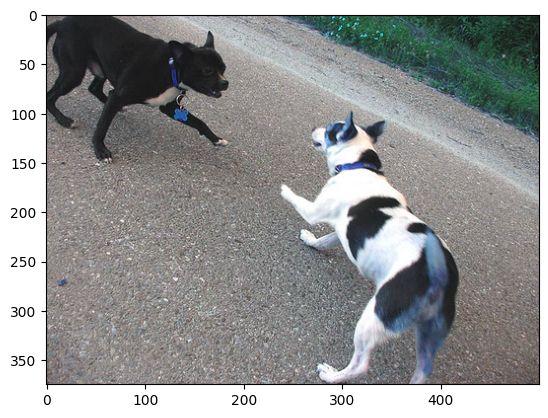

In [75]:
plt.imshow(images[7])

In [76]:
# Checking the output against the original model

img = Image.open(input_image_paths[7])
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base",max_new_tokens=200)
pipe(img)[0]['generated_text']

'two dogs playing on the road'

In [77]:
# My Fine-tuned model
inputs = processor(images=images[7], return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a black dog and a white dog with brown spots are staring at each other in the street.


In [79]:
%cd '/teamspace/studios/this_studio'

/teamspace/studios/this_studio


In [81]:
img = Image.open('IMG_20211118_090828__01.jpg')

In [82]:
# Checking the output against the original model

# img = Image.open(input_image_paths[7])
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base",max_new_tokens=200)
pipe(img)[0]['generated_text']

'a man in a black jacket'

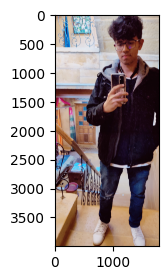

In [92]:
import numpy as np
img_array = np.array(img)
plt.figure(figsize=(4, 3))
plt.imshow(img_array)

In [83]:
# My Fine-tuned model
inputs = processor(images=img, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a man in a black shirt is sitting on a bench holding a leash of yarn.


In [ ]:
# trainer = Trainer(
#     model=base_model,
#     model_flops=model_flops,
#     total_steps=max_steps,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
# )

In [ ]:
# training_output = trainer.train()